In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Receipts Summary

* 440 Receipts have no rewardsReceiptItemList
* 484 Receipts have no purchasedItemCount
* there are about 40 receipts from user 59c124bae4b0299e55b0f330 buying the same item with no purchaseItemCount. They are all pending approval as well


In [292]:
# importing data
receipts = pd.read_json('receipts.json', lines=True)

# converting from json to clean data
date_cols = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']
for column in date_cols :
    receipts[column] = receipts[column].apply(lambda x: x["$date"] if x is not np.nan else np.nan)
receipts['_id'] = receipts['_id'].apply(lambda x: x["$oid"] if x is not np.nan else np.nan)

receipts.head()


,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,150.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,1609687537000,1609687537000,NaN,1609687542000,NaN,5.0,1.609632e+12,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,5.0,1.609632e+12,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,5.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [293]:
# Checking for missing values
receipts.isna().sum()


_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [294]:
# Looking for receipts that have an item list but for some reason no item count
receipts[receipts.rewardsReceiptItemList.notna()][receipts.purchasedItemCount.isna()].head()


C:\Users\noame\AppData\Local\Temp/ipykernel_17524/3859151125.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  receipts[receipts.rewardsReceiptItemList.notna()][receipts.purchasedItemCount.isna()].head()


,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
210,5ffe1cbe0a7214ad28002843,NaN,NaN,1610489022000,1610489022000,1.610489e+12,1610489022000,NaN,NaN,1.610410e+12,NaN,[{'description': 'flipbelt level terrain waist...,PENDING,28.57,59c124bae4b0299e55b0f330
211,5ffce7db0a720f051500236e,NaN,NaN,1610409947000,1610409947000,1.610410e+12,1610409947000,NaN,NaN,1.610410e+12,NaN,[{'description': 'flipbelt level terrain waist...,PENDING,28.57,59c124bae4b0299e55b0f330
213,5ffce8310a7214ad4e003797,NaN,NaN,1610410033000,1610410033000,1.610410e+12,1610410033000,NaN,NaN,1.610410e+12,NaN,[{'description': 'flipbelt level terrain waist...,PENDING,28.57,59c124bae4b0299e55b0f330
214,5ffe19d90a7214ad28000e62,NaN,NaN,1610488281000,1610488281000,1.610488e+12,1610488281000,NaN,NaN,1.610410e+12,NaN,[{'description': 'flipbelt level terrain waist...,PENDING,28.57,59c124bae4b0299e55b0f330
215,5ffe1d030a720f05ac002c9e,NaN,NaN,1610489091000,1610489091000,1.610489e+12,1610489091000,NaN,NaN,1.610410e+12,NaN,[{'description': 'flipbelt level terrain waist...,PENDING,28.57,59c124bae4b0299e55b0f330


## Products Summary

* over 53% of items with descriptions do not have a barcode or a user_flagged_barcode
* 2% of items are not found
* 5% of items have no descriotion
* 2.5% of items have a barcode of 4011
* 8 items have a barcode of 4011, but are not item not found

In [295]:
# First create a temporary dataframe with the exploded items and their receipt IDs
temp_df = receipts.explode('rewardsReceiptItemList')[['_id', 'rewardsReceiptItemList']].copy()

# Now normalize the JSON structure into columns
products_df = pd.json_normalize(
    temp_df['rewardsReceiptItemList'].dropna()
)

# Add receipt ID from our temporary dataframe
products_df['receiptId'] = temp_df.loc[temp_df['rewardsReceiptItemList'].notna(), '_id'].reset_index(drop=True)

# Reset index to clean up the dataframe
products_df = products_df.reset_index(drop=True)

# Display the first few rows and shape of the dataframe
print(f"Shape of products dataframe: {products_df.shape}")
print(products_df.columns)
products_df.head()

Shape of products dataframe: (6941, 35)
Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId', 'receiptId'],
      dtype='object')


,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId,receiptId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1eb0a720f0523000575
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1f10a720f052300057a
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1ee0a7214ada100056f


In [296]:
num_not_found = len(products_df[products_df.description == "ITEM NOT FOUND"])
print(f"Number of items not found: {num_not_found}")
print(f"Percentage of items not found: {100 * num_not_found / len(products_df)}%")

Number of items not found: 173
Percentage of items not found: 2.492436248379196%


In [297]:
num_description_nan = len(products_df[products_df.description.isna()])
print(f"Number of items with description nan: {num_description_nan}")
print(f"Percentage of items with description nan: {100 * num_description_nan / len(products_df)}%")

Number of items with description nan: 381
Percentage of items with description nan: 5.489122604811986%


In [298]:
num_barcode_4011 = len(products_df[products_df.barcode == "4011"])
print(f"Number of items with barcode 4011: {num_barcode_4011}")
print(f"Percentage of items with barcode 4011: {100 * num_barcode_4011 / len(products_df)}%")

Number of items with barcode 4011: 177
Percentage of items with barcode 4011: 2.5500648321567496%


In [299]:
barcode_nan = len(products_df[products_df.barcode.isna()])
print(f"Number of items with barcode nan: {barcode_nan}")
print(f"Percentage of items with barcode nan: {100 * barcode_nan / len(products_df)}%")

Number of items with barcode nan: 3851
Percentage of items with barcode nan: 55.481919031839794%


In [300]:
num_no_barcode_item_not_found = len(products_df[products_df.barcode.isna()][products_df.userFlaggedBarcode.isna()][products_df.description != "ITEM NOT FOUND"][products_df.description.notna()])
print(f"Number of items with no barcode and not item not found: {num_no_barcode_item_not_found}")
print(f"Percentage of items with no barcode and not item not found: {100 * num_no_barcode_item_not_found / len(products_df)}%")

Number of items with no barcode and not item not found: 3701
Percentage of items with no barcode and not item not found: 53.32084714018153%


C:\Users\noame\AppData\Local\Temp/ipykernel_17524/165186512.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_no_barcode_item_not_found = len(products_df[products_df.barcode.isna()][products_df.userFlaggedBarcode.isna()][products_df.description != "ITEM NOT FOUND"][products_df.description.notna()])


In [301]:
# Some items have a barcode of 4011, but are not item not found
products_df[products_df.barcode == "4011"][products_df.description != "ITEM NOT FOUND"][products_df.description.notna()]


C:\Users\noame\AppData\Local\Temp/ipykernel_17524/2606642533.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  products_df[products_df.barcode == "4011"][products_df.description != "ITEM NOT FOUND"][products_df.description.notna()]


,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId,receiptId
1909,4011,BANANAS,1.38,1.38,NaN,1241,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60037b500a7214ad4c000086
1910,4011,BANANAS,0.98,0.98,NaN,1243,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60037b500a7214ad4c000086
3330,4011,Yellow Bananas,1.38,1.38,NaN,1095,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600b2dd60a7214ada200000b
3331,4011,Yellow Bananas,0.98,0.98,NaN,1097,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600b2dd60a7214ada200000b
4967,4011,Yellow Bananas,0.80,0.80,NaN,1465,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600f24970a720f053500002f
4977,4011,Yellow Bananas,0.80,0.80,NaN,1490,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600f24970a720f053500002f
5784,4011,Yellow Bananas,0.80,0.80,NaN,1469,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN,600f39c30a7214ada2000030
6434,4011,Yellow Bananas,0.80,0.80,False,1497,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600f2fc80a720f0535000030


# Brands Summary

37% of the dataset is test data

There are 155 brands that are missing a category (and a categoryCode).

There are 494 brands with categories that are missing categoryCodes. Assuming we have another table where categoryCodes can be used as a primary key, this makes it so we cannot reliably join with category data.

This means that of our of our brands: 21% are missing a category, and 88% are missing a categoryCode.


## Brand Names/Codes

We can see that there are some brands and barcodes that repeat, and have different information when repeating, including missing values.
Since brand names are not unique, and brandCode has missing values, we don't have a primary key for our brands data in our realtional database.

In [302]:
brands = pd.read_json('brands.json', lines=True)
print(f"Number of brands: {len(brands)}")
print(f"Number of missing values:\n {brands.isna().sum()}")
brands.head()

Number of brands: 1167
Number of missing values:
 _id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64


,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


### Percent of data that is test data:

In [303]:
number_of_test_brands = len(brands[brands.name.str.contains("test")])
print(f"Number of test brands: {number_of_test_brands}")
print(f"Percentage of test brands: {100 * number_of_test_brands / len(brands)}%")

Number of test brands: 429
Percentage of test brands: 36.760925449871465%


### How many missing values if we take out test data:


In [304]:
no_test_brands = brands[~brands.name.str.contains("test")]
print(f"Number of missing values if we take out test data: {no_test_brands.isna().sum()}")

Number of missing values if we take out test data: _id               0
barcode           0
category        155
categoryCode    649
cpg               0
name              0
topBrand        407
brandCode       163
dtype: int64


### Brand Names/Codes


In [305]:
repeating_brands = no_test_brands[no_test_brands.name.isin(no_test_brands.name.value_counts()[no_test_brands.name.value_counts() > 1].index)]
repeating_brands.sort_values(by="name")

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
848,{'$oid': '585a961fe4b03e62d1ce0e76'},511111701781,Snacks,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5fbe4b0...",Baken-Ets,1.0,BAKEN-ETS
574,{'$oid': '5d9d08d1a60b87376833e348'},511111605546,Snacks,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5fbe4b0...",Baken-Ets,NaN,BAKEN ETS
140,{'$oid': '5a4d23dae4b0bcb2c74ea77e'},511111000518,Beverages,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5fbe4b0...",Caleb's Kola,0.0,CALEB'S KOLA
740,{'$oid': '5d601d74a3a018514994f422'},511111004912,Snacks,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Caleb's Kola,NaN,CALEBS KOLA
1007,{'$oid': '5d658ffa6d5f3b23d1bc7914'},511111205227,NaN,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Diabetic Living Magazine,NaN,NaN
1006,{'$oid': '5d66d597a3a018093ab34726'},511111805298,Magazines,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5d5d4fd16d5f...",Diabetic Living Magazine,NaN,511111805298
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1081,{'$oid': '5dc2d9d4a60b873d6b0666d2'},511111206330,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f3e4b0...",Dippin Dots® Cereal,NaN,DIPPIN DOTS
194,{'$oid': '5d6415d5a3a018514994f429'},511111605058,Magazines,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5d5d4fd16d5f...",Health Magazine,NaN,511111605058
596,{'$oid': '5f298852be37ce7958c5952d'},511111915287,Magazines,MAGAZINES,"{'$ref': 'Cogs', '$id': {'$oid': '5d66b9dcee7f...",Health Magazine,NaN,HEALTH


### Categories

In [306]:
missing_category = no_test_brands[no_test_brands.category.isna()]
missing_category

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
11,{'$oid': '57c08106e4b0718ff5fcb02c'},511111102540,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332f5f2e4b0...",MorningStar,NaN,NaN
23,{'$oid': '5332f5fee4b03c9a25efd0bd'},511111303947,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '53e10d6368ab...",Bottled Starbucks,NaN,NaN
24,{'$oid': '5332fa7ce4b03c9a25efd22e'},511111802914,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332f5ebe4b0...",Full Throttle,NaN,NaN
34,{'$oid': '5332f772e4b03c9a25efd125'},511111103653,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332f5f3e4b0...",Gold Medal,NaN,NaN
43,{'$oid': '5332f765e4b03c9a25efd11f'},511111503699,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332f5ebe4b0...",Glaceau vitaminwater,NaN,NaN
...,...,...,...,...,...,...,...,...
1123,{'$oid': '5332f7a8e4b03c9a25efd135'},511111403562,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332f7a7e4b0...",Bud Light,NaN,NaN
1135,{'$oid': '5d658fca6d5f3b23d1bc7912'},511111405184,NaN,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Do It Yourself,NaN,NaN
1144,{'$oid': '57c08242e4b0718ff5fcb032'},511111202516,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332f7a7e4b0...",Corona,NaN,NaN
1146,{'$oid': '5332fa12e4b03c9a25efd1e6'},511111703105,NaN,NaN,"{'$ref': 'Cpgs', '$id': {'$oid': '5332fa12e4b0...",Bellatoria,NaN,NaN


In [307]:
missing_categoryCode = no_test_brands[no_test_brands.categoryCode.isna()]
missing_categoryCode[missing_categoryCode.category.notna()]

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
7,{'$oid': '5cdad0f5166eb33eb7ce0faa'},511111104810,Condiments & Sauces,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b0...",J.L. Kraft,NaN,J.L. KRAFT
8,{'$oid': '5ab15636e4b0be0a89bb0b07'},511111504412,Canned Goods & Soups,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5a734034e4b0...",Campbell's Home Style,0.0,CAMPBELLS HOME STYLE
12,{'$oid': '588ba07be4b02187f85cdadd'},511111201076,Baking,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b0...",Calumet,0.0,CALUMET
13,{'$oid': '5d6413156d5f3b23d1bc790a'},511111205012,Magazines,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5d5d4fd16d5f...",Entertainment Weekly,NaN,511111205012
14,{'$oid': '585a9611e4b03e62d1ce0e74'},511111801801,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5fbe4b0...",AUNT JEMIMA Syrup,0.0,AUNT JEMIMA SYRUP
...,...,...,...,...,...,...,...,...
1159,{'$oid': '585a96cbe4b03e62d1ce0e88'},511111501619,Beverages,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5fbe4b0...",Pepsi Max,0.0,
1160,{'$oid': '5887a216e4b02187f85cdad5'},511111401155,Deli,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '559c2234e4b0...",Claussen,0.0,CLAUSSEN
1161,{'$oid': '5332f709e4b03c9a25efd0f2'},511111403845,Beer Wine Spirits,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f709e4b0...",Blue Moon,0.0,BLUE MOON
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL


# Users

* 495 Users
* 283 (57%) of rows are duplicates
* of the non-duplicate users: 
    * 40 are missing a lastLogin date. Nothing seems special about them. Have they never logged in?
    * 5 are missing a signUpSource, but they are the 5 oldest users. Is this before the signUpSource was implemented?
    * 6 are missing a state, also mostly old users, however not all of them.


In [308]:
users = pd.read_json('users.json', lines=True)
print(f"Number of users: {len(users)}")
#reformat dictionaries
users._id = users._id.apply(lambda x: x["$oid"] if x is not np.nan else np.nan)
users.lastLogin = users.lastLogin.apply(lambda x: x["$date"] if x is not np.nan else np.nan)
users.createdDate = users.createdDate.apply(lambda x: x["$date"] if x is not np.nan else np.nan)
users.head()

Number of users: 495


,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,1609687530554,1.609688e+12,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,1609687444800,1.609688e+12,consumer,Email,WI


In [309]:
#checking for identical rows
print(f"Number of duplicate rows: {users.duplicated().sum()}")

#removing duplicates
users = users.drop_duplicates()

#check missing values
users.isna().sum()

Number of duplicate rows: 283


_id              0
active           0
createdDate      0
lastLogin       40
role             0
signUpSource     5
state            6
dtype: int64

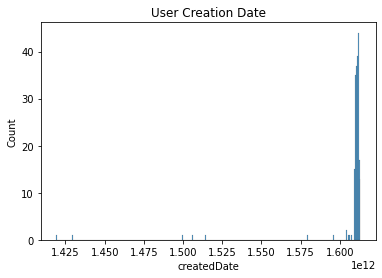

In [310]:
sns.histplot(users.createdDate)
plt.title("User Creation Date")
plt.show()

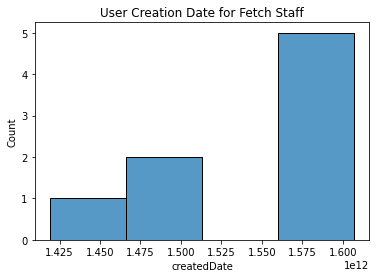

In [311]:
sns.histplot(users.createdDate.where(users.role == "fetch-staff"))
plt.title("User Creation Date for Fetch Staff")
plt.show()
# this explain the weird histogram from before

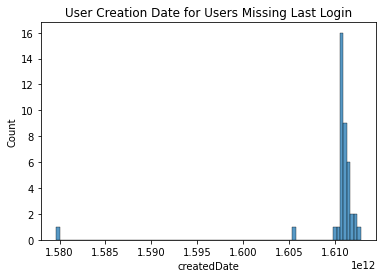

In [312]:
sns.histplot(users[users.lastLogin.isna()].createdDate)
plt.title("User Creation Date for Users Missing Last Login")
plt.show()

# only one odd point. makes sense that newer users are less likely to have not logged in yet.